In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
df = pd.read_csv("data_to_train_and_test.csv", sep=",")
df.head()

,Unnamed: 0,ind,rain,ind.1,ind.2,wetb,dewpt,vappr,rhum,msl,...,w,sun,vis,clht,clamt,weekend,season,work_time,mean,temp
0,2009-07-15 00:00:00,3.0,0.00,0.0,0.0,11.40,11.30,13.30,98.0,1002.80,...,81.0,0.0,25000.0,999.0,1.0,0,2,0,0.341659,11.6
1,2009-07-15 00:30:00,3.0,0.00,0.0,0.0,11.25,11.05,13.15,97.0,1003.15,...,46.0,0.0,27500.0,999.0,1.0,0,2,0,0.274463,11.5
2,2009-07-15 01:00:00,3.0,0.00,0.0,0.0,11.10,10.80,13.00,96.0,1003.50,...,11.0,0.0,30000.0,999.0,1.0,0,2,0,0.231365,11.4
3,2009-07-15 01:30:00,3.0,0.05,0.0,0.0,11.00,10.70,12.90,96.0,1003.95,...,11.0,0.0,30000.0,999.0,1.0,0,2,0,0.202708,11.3
4,2009-07-15 02:00:00,3.0,0.10,0.0,0.0,10.90,10.60,12.80,96.0,1004.40,...,11.0,0.0,30000.0,999.0,1.0,0,2,0,0.182256,11.2


<Axes: >

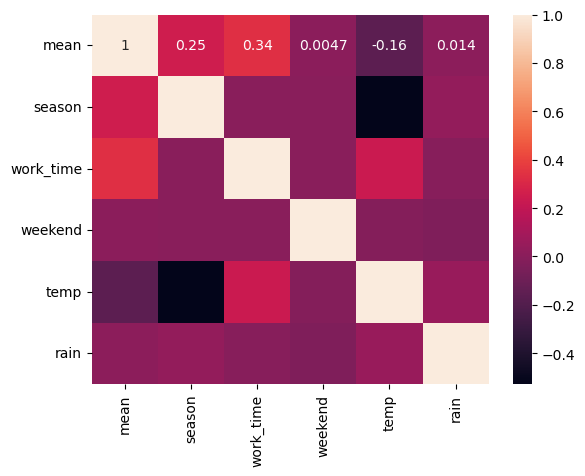

In [3]:
sns.heatmap(df[['mean', 'season', 'work_time', 'weekend', 'temp', 'rain']].corr(), annot = True)

In [9]:
from sklearn.model_selection import train_test_split
data = df[['season', 'work_time', 'temp']]
target = df[['mean']]
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [11]:
import tensorflow.keras.backend as K

def mean_absolute_percentage_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))) * 100

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, batch_size=1, epochs=20)

C:\Users\alexa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 122s 5ms/step - loss: 0.0442
Epoch 2/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 109s 5ms/step - loss: 0.0413
Epoch 3/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 109s 5ms/step - loss: 0.0409
Epoch 4/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 105s 5ms/step - loss: 0.0413
Epoch 5/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 106s 5ms/step - loss: 0.0407
Epoch 6/20
 6718/19890 ━━━━━━━━━━━━━━━━━━━━ 1:09 5ms/step - loss: 0.0399

In [11]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inversion de la normalisation pour obtenir les vraies valeurs
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Visualisation des résultats
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (look_back * 2) + 1:len(data) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(data))
plt.plot(train_plot)
plt.plot(test_plot)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('LSTM Model Predictions')
plt.legend(['Original Data', 'Training Predictions', 'Test Predictions'])
plt.show()

NameError: name 'model' is not defined